In [6]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((60000, 784)).astype('float32')/255
x_test = x_test.reshape((10000, 784)).astype('float32')/255

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_dim=784))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=256, validation_split=0.05, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Precisió del model:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9646
Precisió del model: 0.9646000266075134


313/313 [==============================] - 1s 2ms/step


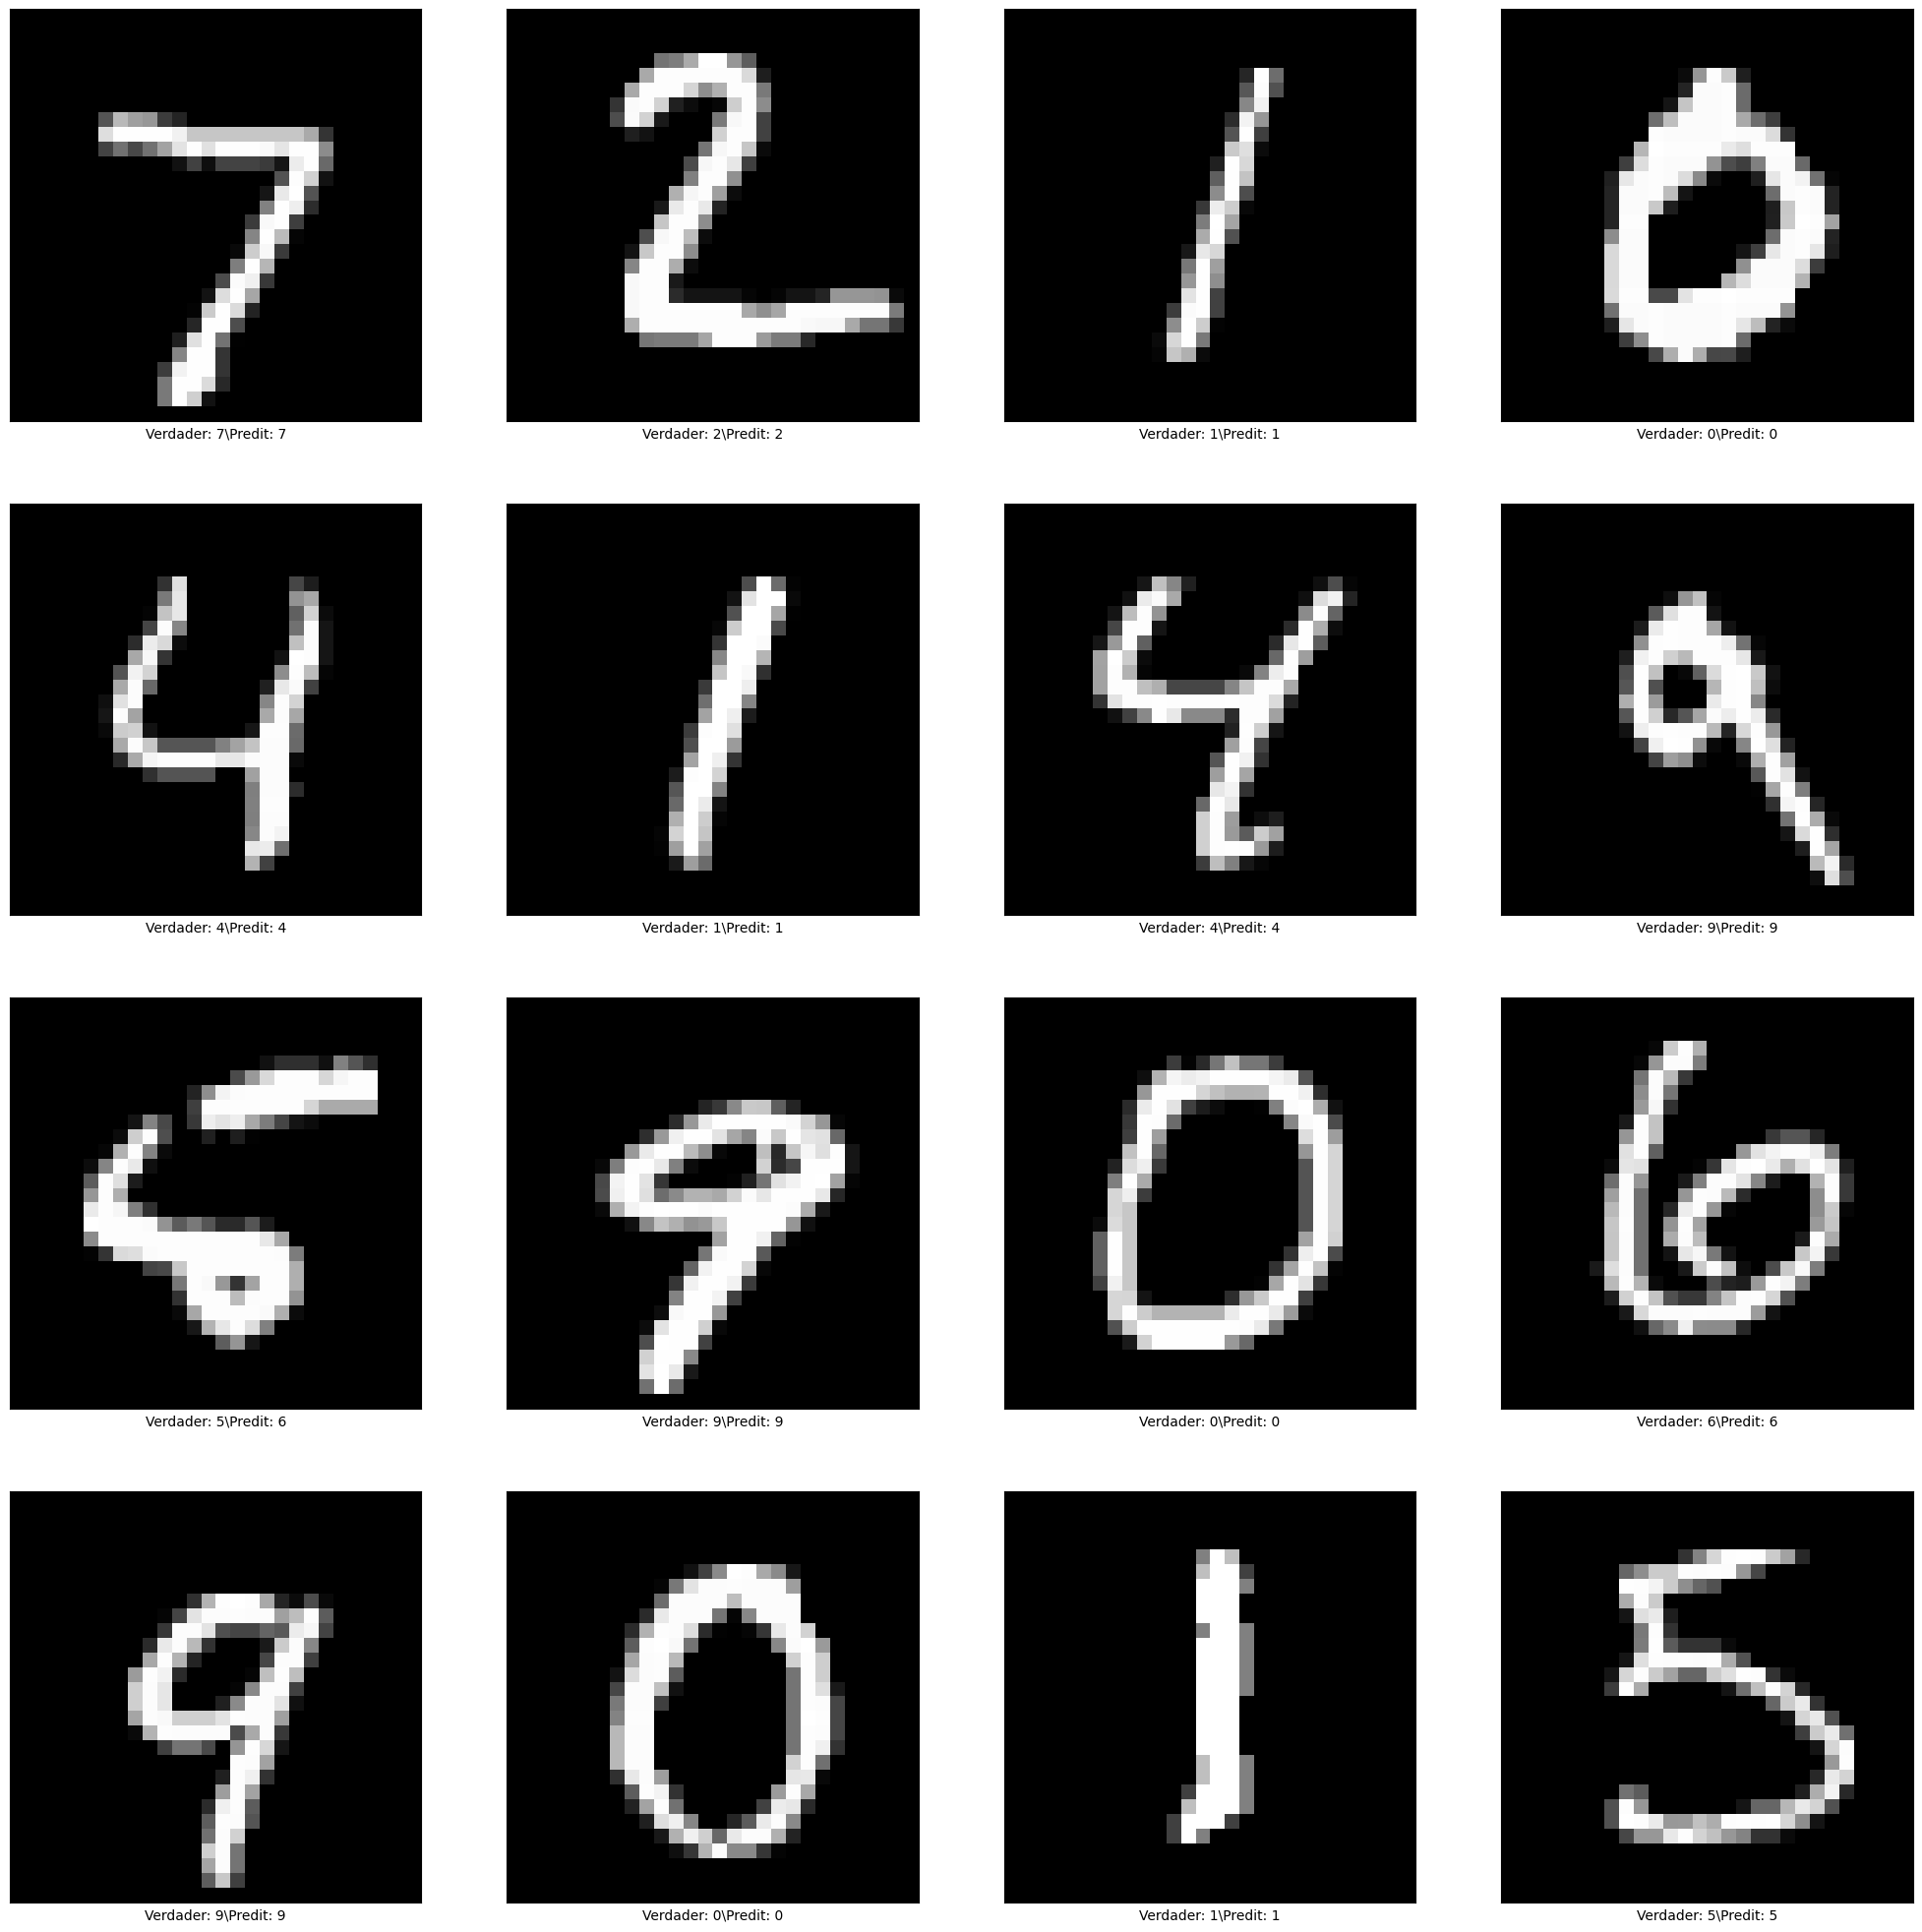

In [10]:
def plot_images(images, labels_true, labels_pred):
    fig, axes = plt.subplots(4, 4, figsize=(25, 25))
    for i, ax in enumerate(axes.flat):

        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        
        true_label = np.argmax(labels_true[i])
        pred_label = np.argmax(labels_pred[i])
        ax.set_xlabel(f'Verdader: {true_label}\Predit: {pred_label}')
        
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()

predictions = model.predict(x_test)

plot_images(x_test, y_test, predictions)